In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Set up canvas dimensions and initialize with white (RGB: 1,1,1)
canvas_height, canvas_width = 1300, 1400
canvas = np.ones((canvas_height, canvas_width, 3), dtype=float) 

# Pixel plotting function for setting pixels to red
def set_circle(x, y, color=(1, 0, 0)):  # Default color set to red (1, 0, 0)
    if 0 <= x < canvas_width and 0 <= y < canvas_height:
        canvas[y, x] = color  # Set the pixel to red
        
def set_pixel(x, y):
    if 0 <= x < canvas_width and 0 <= y < canvas_height:
        canvas[y, x] = (0,0,0)  # Set pixel to black

In [2]:
# Drawing circle symmetry points
def draw_circle(xc, yc, x, y):
    set_circle(xc + x, yc + y)
    set_circle(xc - x, yc + y)
    set_circle(xc + x, yc - y)
    set_circle(xc - x, yc - y)
    set_circle(xc + y, yc + x)
    set_circle(xc - y, yc + x)
    set_circle(xc + y, yc - x)
    set_circle(xc - y, yc - x)

# Bresenham's Circle Algorithm
def bresenham_circle(x_center, y_center, radius):
    x = 0
    y = radius
    d = 3 - 2 * radius
    draw_circle(x_center, y_center, x, y)
    while y >= x:
        x += 1
        if d > 0:
            y -= 1
            d = d + 4 * (x - y) + 10
        else:
            d = d + 4 * x + 6
        draw_circle(x_center, y_center, x, y)

In [3]:
# # Dashed Circle
# def draw_circle(xc, yc, x, y, dash_length=5, gap_length=5, count=[0]):
#     if count[0] % (dash_length + gap_length) < dash_length:
#         set_circle(xc + x, yc + y)
#         set_circle(xc - x, yc + y)
#         set_circle(xc + x, yc - y)
#         set_circle(xc - x, yc - y)
#         set_circle(xc + y, yc + x)
#         set_circle(xc - y, yc + x)
#         set_circle(xc + y, yc - x)
#         set_circle(xc - y, yc - x)
#     count[0] += 1

# # Bresenham's Circle Algorithm for Dashed Circle
# def bresenham_circle(x_center, y_center, radius, dash_length=5, gap_length=5):
#     x = 0
#     y = radius
#     d = 3 - 2 * radius
#     count = [0]  # Use a list to keep a mutable count
#     draw_circle(x_center, y_center, x, y, dash_length, gap_length, count)
    
#     while y >= x:
#         x += 1
#         if d > 0:
#             y -= 1
#             d = d + 4 * (x - y) + 10
#         else:
#             d = d + 4 * x + 6
#         draw_circle(x_center, y_center, x, y, dash_length, gap_length, count)


In [4]:
# def bresenham_line(x0, y0, x1, y1):
#     # Calculate the differences in x and y directions
#     dx = abs(x1 - x0)
#     dy = abs(y1 - y0)

#     # Determine the direction of increment for x and y
#     sx = 1 if x1 > x0 else -1
#     sy = 1 if y1 > y0 else -1

#     # Initialize decision variables
#     if dx > dy:
#         dT = 2 * (dy - dx)  # Adjusted error term when stepping in y
#         dS = 2 * dy         # Step size in y when moving in x
#         d = 2 * dy - dx     # Initial decision variable
#         x, y = x0, y0

#         # Loop to iterate over x, adjusting y based on the decision variable
#         while x != x1:
#             set_pixel(x, y)  # Plot the current pixel
#             x += sx  # Move in the x direction
#             if d < 0:
#                 d += dS  # Adjust error for next point
#             else:
#                 y += sy  # Move in the y direction when error threshold is met
#                 d += dT  # Adjust error for slope

#     else:
#         dT = 2 * (dx - dy)  # Adjusted error term when stepping in x
#         dS = 2 * dx         # Step size in x when moving in y
#         d = 2 * dx - dy     # Initial decision variable
#         x, y = x0, y0

#         # Loop to iterate over y, adjusting x based on the decision variable
#         while y != y1:
#             set_pixel(x, y)  # Plot the current pixel
#             y += sy  # Move in the y direction
#             if d < 0:
#                 d += dS  # Adjust error for next point
#             else:
#                 x += sx  # Move in the x direction when error threshold is met
#                 d += dT  # Adjust error for slope

#     # Plot the final point
#     set_pixel(x, y)


In [5]:
# Optimized Bresenham's Line Algorithm function
def bresenham_line(x0, y0, x1, y1):
    # Calculate the differences in x and y directions
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)

    # Handle the case of a vertical line (constant x)
    if dx == 0:
        for y in range(min(y0, y1), max(y0, y1) + 1):
            set_pixel(x0, y)  # Plot the pixel for each point along the vertical line
        return

    # Handle the case of a horizontal line (constant y)
    if dy == 0:
        for x in range(min(x0, x1), max(x0, x1) + 1):
            set_pixel(x, y0)  # Plot the pixel for each point along the horizontal line
        return

    # Decision variables for the Bresenham algorithm
    # dT controls how much to adjust the error term, dS is the step size in the y direction
    dT = 2 * (dy - dx)  # Total error to adjust
    dS = 2 * dy  # Step size to move y in each iteration
    d = 2 * dy - dx  # Initial error term

    # Starting points for x and y
    x, y = x0, y0

    # If the line is more horizontal than vertical, iterate over x and adjust y
    if dx >= dy:
        set_pixel(x, y)  # Plot the starting point
        while x < x1:
            x += 1  # Move in the x direction
            if d < 0:
                d += dS  # Adjust the error term if the line is flat
            else:
                y += 1 if y1 > y0 else -1  # Move in the y direction based on the line's slope
                d += dT  # Adjust the error term for the slope
            set_pixel(x, y)  # Plot the pixel at the new position

    # If the line is more vertical than horizontal, iterate over y and adjust x
    else:
        set_pixel(x, y)  # Plot the starting point
        while y < y1:
            y += 1  # Move in the y direction
            if d > 0:
                x += 1 if x1 > x0 else -1  # Move in the x direction based on the line's slope
                d -= 2 * dx  # Adjust the error term for the slope
            d += dS  # Adjust the error term
            set_pixel(x, y)  # Plot the pixel at the new position


In [6]:
# Bresenham's Line Dashed Algorithm function with enhanced visibility
def bresenham_line_dashed(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    dash_length = 5 # dash_length: Specifies how many pixels to draw for each dash.
    gap_length = 3 # gap_length: Specifies the number of pixels to skip after each dash.
    step = 0 # step: A counter used to keep track of the number of pixels drawn or skipped.
    dash_on = True # dash_on: A boolean flag to indicate whether the current segment is a dash (true) or a gap (false).

    # Handle vertical line
    if dx == 0:
        for y in range(min(y0, y1), max(y0, y1) + 1):
            if dash_on:
                set_pixel(x0, y)
            step += 1
            if step >= (dash_length if dash_on else gap_length):
                step = 0
                dash_on = not dash_on  # Toggle dash/gap
        return

    # Handle horizontal line
    if dy == 0:
        for x in range(min(x0, x1), max(x0, x1) + 1):
            if dash_on:
                set_pixel(x, y0)
            step += 1
            if step >= (dash_length if dash_on else gap_length):
                step = 0
                dash_on = not dash_on
        return

    # Initialize decision variables
    dT = 2 * (dy - dx)
    dS = 2 * dy
    d = 2 * dy - dx

    x, y = x0, y0
    if dx >= dy:
        while x <= x1:
            if dash_on:
                set_pixel(x, y)
            step += 1
            if step >= (dash_length if dash_on else gap_length):
                step = 0
                dash_on = not dash_on  # Toggle dash/gap
            x += 1
            if d < 0:
                d += dS
            else:
                y += 1 if y1 > y0 else -1
                d += dT
    else:
        while y <= y1:
            if dash_on:
                set_pixel(x, y)
            step += 1
            if step >= (dash_length if dash_on else gap_length):
                step = 0
                dash_on = not dash_on
            y += 1
            if d > 0:
                x += 1 if x1 > x0 else -1
                d -= 2 * dx
            d += dS


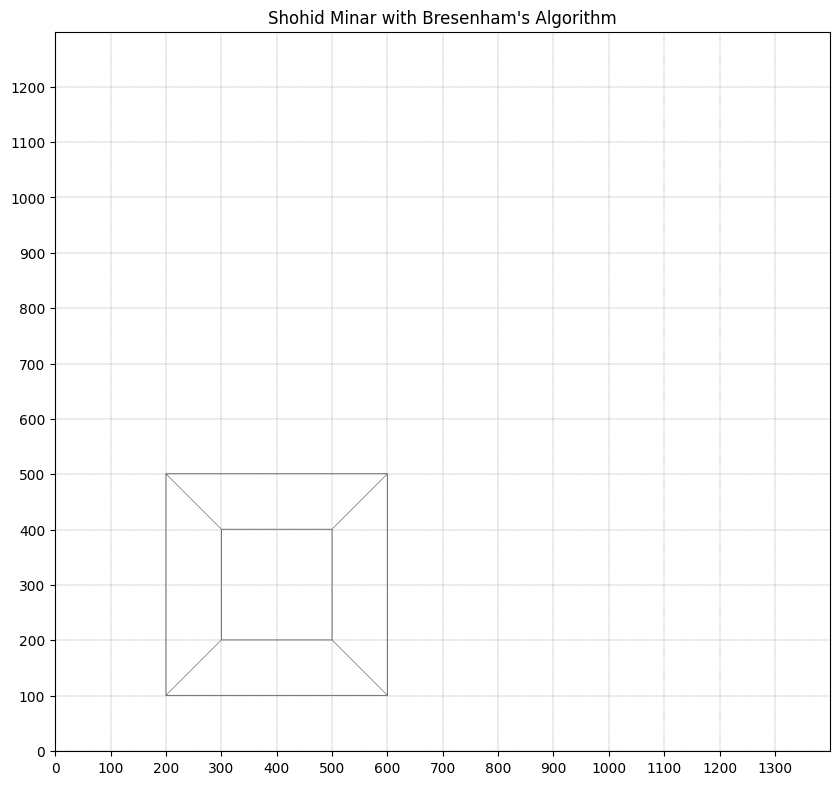

In [7]:
# Main drawing function for Shohid Minar
def display_drawings():

    
    ## inner rectangle
    bresenham_line(300, 200, 300, 400)
    bresenham_line(500, 200, 500, 400)

    bresenham_line(300, 200, 500, 200)
    bresenham_line(300, 400, 500, 400)
    
    ## outer rectangle
    bresenham_line(200, 100, 200, 500)
    bresenham_line(600, 100, 600, 500)

    bresenham_line(200, 100, 600, 100)
    bresenham_line(200, 500, 600, 500)

    ## corner
    bresenham_line(200, 500, 300, 400)
    bresenham_line(500, 400, 600, 500)

    bresenham_line(200, 100, 300, 200)
    bresenham_line(500, 200, 600, 100)

    
    
    
    # Display canvas with grid
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(canvas, cmap="gray", origin="upper")
    ax.set_xticks(np.arange(0, canvas_width, 100))
    ax.set_yticks(np.arange(0, canvas_height, 100))
    ax.grid(color='gray', linestyle='--', linewidth=0.3)
    ax.set_title("Shohid Minar with Bresenham's Algorithm")
    plt.gca().invert_yaxis()  # Ensures y-axis is oriented upwards
    plt.show()

# Run the drawing function
display_drawings()
